# pyCapsid Colab




## Description
This Colab notebook contains a pipeline to predict dominant dynamics and quasi-rigid mechanical units in large protein complexes. The outputs capture the molecular regions likely to be involved in structural transitions, including transitions triggering the disassembly of the protein complex.

The notebook builds on the Python package [pyCapsid](https://luquelab.github.io/pyCapsid/), which combines elastic network models, normal mode analysis, and clustering methods. The current version is targeted towards protein shells, like viral capsids. Check pyCapsid's [online documentation](https://luquelab.github.io/pyCapsid/) for further technical details.

## Quick-start guide
If you are a first time user, we recommend you to test that your browser works well with the Colab notebook and that it can download the outputs expected by the default values. Click the `Runtime` menu on the navigation bar and select `Run all`. Read steps `4.` and `5.` from the list below to navigate and interpret the outputs. If your browser does not produce any outputs, test the the notebook on [Google Chrome](https://www.google.com/chrome/). If you encounter any problems when adapting the notebook to your specific structure, [open an issue in the pyCapsid repository](https://github.com/luquelab/pyCapsid/issues), and we will respond as soon as possible.

If the test suggested above worked well in your browser, follow the steps described below to obtain the dominant dynamics and quasi-rigid units of the protein complex of your interest. To navigate this notebook, we recommend displaying the Colab notebook's Table of contents (open the `View` menu on the top bar and choose `Table of contents`):
0. If you have an existing Colab runtime, go to the colab menu `Runtime` and select `Disconnect and delete runtime` for a clean start.
1. Specify the structure to be analyzed in the [Input structure](#scrollTo=Input_structure) section. Run the code block to set the parameters and, if not fetching a remote structure, upload the structure file.
2. Modify the default pyCapsid parameters if necessary in the [pyCapsid parameters](#scrollTo=pyCapsid_parameters) section. Run the code block to set the parameters.
3. Execute the rest of the notebook by navigating the Colab menu `Runtime` and choosing the option `Run all` or `Run after` in the cell after the pyCapsid parameters. This will install pyCapsid, run the pipeline, and generate and download the results.
  + The pipeline will automatically compress and download the outputs in two zip files. Your browser might prompt a request to allow the downloading process. `pyCapsid_report.zip` contains key results, a report summarizing them, and instructions for visualizing the results in ChimeraX. `pyCapsid_results.zip` contains all of the relevant data files created by pyCapsid and a readme describing their contents.  
  + If you encounter any issues in the downloading process, check the section [Problems downloading results?](#scrollTo=Problems_downloading_results_)
  + The execution time and maximum size of the protein complex depend on the computing power and memory of the Colab cloud service used, which depends on the user's Colab plan. The section [Estimate time and memory](#scrollTo=Estimate_time_and_memory) gives an estimate of the time and memory requirements based on the number of residues in the structure.
4. Extract and read the downloaded report (`pyCapsid_report.*`) for a summary and interpretation of the main results. The report is available in three formats: Markdown, (`*.md`), Microsoft Word (`*.docx`), and Web page's HyperText Markup Language (`*.html`). The multi-formatted report aims to facilitate users adapting pyCapsid's results to their publication needs. Check the section [pyCapsid report](#scrollTo=pyCapsid_report) for further details.   
   + Additional results (mostly print outputs) are displayed throughout the notebook cells in the [Run the pyCapsid pipeline](#scrollTo=Run_the_pyCapsid_pipeline) section. For further technical details look at the output of cells in this section of the notebook.
5. The 3D images of the protein complex will be missing in `pyCapsid_report.*`. You will need to generate them using [ChimeraX](https://www.cgl.ucsf.edu/chimerax/). This will also generate interactive models that you may use to make custom visualizations.
  + We recommend downloading and installing ChimeraX from [here](https://www.cgl.ucsf.edu/chimerax/download.html).
  + To visualize the quasi-rigid domains obtained, open a new session in ChimeraX and run the following instruction in the command line to open a file browser in ChimeraX:
```
runscript browse
```
  + Then, inside the browser, navigate in the `pyCapsid_report/chimerax/` folder and open the script `chimerax_script_colab.py`.
  + This will generate a 3D model of the protein complex coloring the quasi-rigid domains in ChimeraX and store snapshots in the folder `pyCapsid_report/figures/structures/` that will be visible in the `.html` and `.md` reports.
  + To generate an animation of the dynamics of the lowest-frequency non-degenerate mode, start a new ChimeraX session and follow the same steps above, but opening instead the script `chimerax_script_animate_mode.py`.
  + This will generate a movie in `mp4` format in the same folder as the images mentioned above.
  + Only one mode may be visualized at a time. By default the lowest frequency non-degenerate mode is visualized, and only modes of that frequency and lower are included in the report. To visualize higher frequency modes, you may copy the `modes.npz` file from `pyCapsid_results.zip` to the `chimerax` folder of the report and rename it accordingly.
  + The optional arguments of these scripts are described in the [ChimeraX visualization options](#scrollTo=ChimeraX_visualization_options) section.
  + Both scripts can be modified to fit the users needs. To do this reference the ChimeraX commands (https://www.cgl.ucsf.edu/chimerax/docs/user/index.html) and the ChimeraX Python API (https://www.cgl.ucsf.edu/chimerax/docs/devel/index.html#).

6. Optionally, read the section [Generate advanced analysis](#scrollTo=Generate_advanced_analysis) to learn how to obtain advanced analyses using results stored during the execution of the pyCapsid pipeline.


## Issues, support, and citation
pyCapsid is licensed under the permissive free software license, MIT License. It is recommended to run the Colab notebook using [Google Chrome Browser](https://www.google.com/chrome/).

+ If you encounter any problem using pyCapsid or required any additional functionalities, please, [open an issue on GitHub](https://github.com/luquelab/pyCapsid/issues).
+ If you use pyCapsid and would like to help support its development further, please, [add a star to its GitHub repository](https://github.com/luquelab/pyCapsid).
+ If you publish any work that included the use of pyCapsid, please, follow its [online citation guide](https://luquelab.github.io/pyCapsid/acknowledgements/).

# Input structure and parameters

## Input structure
pyCapsid requires the protein complex to be encoded in the [Protein Data Bank (PDB) format](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/introduction).

### Source and structure
Fill the variables in the block code below to specify the source and identifier for the structure. Follow these guides:
+ `pdb_source` determines if the structure will be fetched from the Protein Data Bank (`'PDB'`) or uploaded (`'upload'`).
+ `pdb_id` stores the PDBid to fetch the structure online.
+ `assembly_id` specifies the biological assembly. If not set it defaults to 1. If no assembly info is provided in the structures set this value to None.

If the option is `'upload'`, when executing the code cell below a prompt will appear to choose the file from the local directory. The maximum file size allowed in the standard Colab cloud-server is 2 GB.

In [ ]:
# Specify the PDB source
pdb_source = 'PDB' #Values expected: 'PDB' or 'upload'

# Specify the PDBid (if the structure has to be fetched online)
pdb_id = '7s21'

# Specify the biological assembly. If not set defaults to 1. If no assembly info is provided
# for the structure set the value to None
assembly_id = 1

# Print option
if pdb_source == 'PDB':
  print('The structure with PDBid ' + pdb_id + ' will be fetched from the Protein Data Bank.')

elif pdb_source == 'upload':

  from google.colab import files
  uploaded = files.upload()
  pdb_file_name = list(uploaded.keys())[0] # Extract PDB file name
  print('The name of the PDB file is ' + pdb_file_name)

else:
  print('The value `'+ pdb_source +'` specifed in `pdb_source` is not valid. Choose from the expected options above.')

## pyCapsid parameters

Edit the variables in the block code below to specify the main options in the pyCapsid calculations. If you do not edit anything, the default values will be used. The list below describes the variables and their options:

+ `ENM_model` specifies the elastic network model used to coarse-grained the protein complex. There are four different models that can be specified:
  + `ANM`: Anisotropic network model with a default cutoff of 15Å and no distance weighting.
  + `GNM`: Gaussian network model (no three-dimensional directionality) with a default cutoff of 7.5Å and no distance weighting.
  + `U-ENM`: Unified elastic network Model with a default cutoff of 7.5Å and a default anisotropy parameter (f_anm) of 0.1. It is the **default** and **recommended** option.
  + `bbENM`: Backbone-enhanced Elastic network model with a default cutoff of 7.5Å and no distance weighting.

+ `n_modes` specifies the number of modes to be used to calculate the dynamics. Must be an integer. The default value is 200. However, while using 200 modes can yield good results, we recommend using more modes for larger structures. Increasing the number of modes often improves the accuracy but results in longer computational times. The `fit_modes` option described below can assist in selecting the optimal value for this parameter.

+ `fit_modes` is True or False. If true pyCapsid will select the number of low-frequency modes used in further calculations by finding the number of modes (less than n_modes) that results in the best correlation with experimental B-factors. If true pyCapsid will also provide a plot showing how correlation with B-factors changes with the number of modes used. If false, all modes calculated will be used.

+ `cluster_min` specifies the minimum number of clusters used in the clustering analysis to identify the optimal quasi-rigid mechanical units. The minimum value is 3.

+ `cluster_max` specifies the maximum number of clusters used in the clustering analysis to identify the optimal quasi-rigid mechanical units. The number of residues in the structure represents an upper value. The default value is 100. The recommended value should be at least the number of proteins in the structure. Ideally, the value should be the number of proteins times the number of expected protein domains defining the protein fold.

+ `cluster_delta` specifies the steps taken when exploring the range of clusters to determine the optimal quasi-rigid mechanical units. The default value is 2. It is recommended to refine the search in a sub-region once a potential optimal result has been identified.


In [ ]:
# Specify values

## Elastic network model
ENM_model = 'U-ENM' # Values expected: 'ANM', 'GNM', 'U-ENM', and 'bbENM'.

## Number of modes used in the dynamics
n_modes = 200

## Whether to use the number of modes that maximize CC
fit_modes = True

## Cluster range and step in the optimal analysis of quasi-rigid units.
cluster_min = 4
cluster_max = 130
cluster_delta = 2

## NGLView visualizations
#visualize_nglview = 'none'

# Double-check options

## Elastic model
valid_ENM = ['ANM','GNM','U-ENM', 'bbENM']
if ENM_model in valid_ENM:
  print('The ENM model used for coarse-graining is ' + ENM_model + ' .')
else:
  print('The value `'+ ENM_model +'` specifed in `ENM_model` is not valid. Choose from the expected options above.')

if ENM_model == 'GNM':
  is3d = False
else:
  is3d = True

## Modes
### Cast to non-negative integers
n_modes = abs(int(n_modes))
if n_modes > 0:
  print('The number of modes in the dynamics will be ' + str(n_modes) + ' .')
else:
  print('WARNING: The values of `n_modes` should be both larger than zero.')

## Clusters
### Cast to non-negative integers
cluster_min = abs(int(cluster_min))
cluster_max = abs(int(cluster_max))
cluster_delta = abs(int(cluster_delta))
if ((cluster_min > 0) and (cluster_max > 0)):
  if cluster_min <= cluster_max:
    print('The lowest number of quasi-rigid units explored will be ' + str(cluster_min) + ' .')
    print('The largest number of quasi-rigid units explored will be ' + str(cluster_max) + ' .')
    print('The resolution of search for the optimal number of quasi-rigid units will be ' + str(cluster_delta) + ' .')

  elif cluster_min > cluster_max:
    print('WARNING: The value of `cluster_min` should be smaller or equal to `cluster_max`.')

else:
  print('WARNING: The values of `cluster_min` and `cluster_max` should be both larger than zero.')

## Estimate time and memory

When using the free Colab cloud service expect small protein shells (up to \~40,000 residues) to run in less than 10 minutes and medium shells (\~80,000 residues) in 2 or more hours. To investigate capsids exceeding 8 GB of RAM (120,000+ residues), consider upgrading your [Colab plan](https://colab.research.google.com/signup) or installing pyCapsid locally via [GitHub](https://github.com/luquelab/pyCapsid), [PIP](https://pypi.org/project/pyCapsid/), or [Conda](https://anaconda.org/luque_lab/pycapsid), as detailed in its [online installation guide](https://luquelab.github.io/pyCapsid/installation/). Alternatively you may lower the number of modes calculated (n_modes parameter) or use the 'GNM' model at the cost of accuracy in the results. The 'GNM' model also does not allow for visualizing mode dynamics.

# Installation

The following command installs pyCapsid and the necessary components for visualizing results in this notebook.

## pyCapsid

In [ ]:
!pip install --upgrade pyCapsid

## NGL viewer

In [ ]:
#if visualize_nglview in ('full', 'calphas'):
#  !pip install ipywidgets==7.7.2 nglview
!pip install ipywidgets==7.7.2 nglview

## Import packages

In [ ]:
# This import is required to handle files
from google.colab import files

In [ ]:
# This is required to use NGLView in google Colab. Colab will likely still warn
# you about adding this line, despite it is already added. Ignore those warnings.
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# This import are required for calculations and plots
import numpy as np
import matplotlib.colorbar as colorbar
import matplotlib.pyplot as plt

In [ ]:
# This imports are required to use NGL viewer as well as the capabilities of pyCapsid to generate structures.
import nglview as ngl
from nglview.adaptor import FileStructure
import biotite.structure.io as strucio
from pyCapsid.VIS import createCapsidView
from pyCapsid.VIS import createClusterRepresentation
from pyCapsid.VIS import clusters_colormap_hexcolor

# Run the pyCapsid pipeline


## Extract features from input structure
This code loads the information from the input structure (PDB format) necessary for the calculations and validation in pyCapsid.



In [ ]:
from pyCapsid.PDB import getCapsid

if pdb_source == 'PDB':
  # Extract the features fetching the PDB structure from the Protein Data Bank.
  pdb = pdb_id
  capsid, calphas, asymmetric_unit, coords,  bfactors, chain_starts, title = getCapsid(pdb, save_full_pdb=True, assembly_id=assembly_id)
  print('The strucure ' + pdb + ' was fetched in the pyCapsid pipeline.')

elif pdb_source == 'upload':
  pdb = pdb_file_name
  capsid, calphas, asymmetric_unit, coords, bfactors, chain_starts, title = getCapsid(pdb, local = True, assembly_id=assembly_id)
  print('The strucure in the file ' + pdb + ' was inputed in the pyCapsid pipeline.')
else:
  print('WARNING: The PDB structure is not available.')

## Build the elastic network model (ENM)
This step uses the function `buildENMPreset` in pyCapsid to specify the elastic network model and build the associated hessian matrix.

In [ ]:
from pyCapsid.CG import buildENMPreset
kirch, hessian = buildENMPreset(coords, preset = ENM_model, chain_starts=chain_starts)

## Perform the Normal Mode Analysis (NMA)

This section obtains the dynamics of the protein complex based on the dominant normal modes activated by thermal energy.

### Calculate the low frequency modes
This code obtains the number of low frequency modes specified by the variable `n_modes` in the [pyCapsid parameters section](#scrollTo=b_8gyJk1wLlV). The calculation relies on the eigenvalues and eigenvectors of the hessian matrix obtained in the [Build the elastic network model section](#scrollTo=cf28904f).

In [ ]:
from pyCapsid.NMA import modeCalc
evals, evecs = modeCalc(hessian, n_modes = n_modes, is3d=is3d)

### Predict, scale, and validate the b-factors
This code uses the resulting normal modes and frequencies to predict the b-factors of each alpha carbon, fits these results to experimental values from the pdb entry, and plots the results for comparison.

In [ ]:
from pyCapsid.NMA import fitCompareBfactors
evals_scaled, evecs_scaled, cc, gamma, n_modes_best = fitCompareBfactors(evals, evecs, bfactors, pdb, fit_modes=fit_modes, is3d=is3d)

## Perform the analysis of quasi-rigid clusters (QRC)

In [ ]:
from pyCapsid.NMA import calcDistFlucts
from pyCapsid.QRC import findQuasiRigidClusters

dist_flucts = calcDistFlucts(evals_scaled, evecs_scaled, coords, is3d=is3d)

cluster_start = cluster_min
cluster_stop = cluster_max
cluster_step = cluster_delta
labels, score, residue_scores  = findQuasiRigidClusters(pdb, dist_flucts, cluster_start=cluster_start, cluster_stop=cluster_stop, cluster_step=cluster_step)

# pyCapsid report

The block code below generates a report with the key results in the analysis. The information is outputted in three formats:
+ Markdown file included in the downloaded outputs.
+ Pdf file included in the downloaded outputs.
+ HTML file included in the downloaded outputs.



In [ ]:
# Prepare file names
file_name = 'pyCapsid_report'
file_md = file_name+'.md' # Markdown
file_html = file_name+'.html' # HTML
file_docx = file_name+'.docx'

In [ ]:
# Include libraries to generate plots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Generate separate folder for the report
import os

parent_dir = os.getcwd()
report_dir_name = f'{pdb}_pyCapsid_report'
report_dir = parent_dir + '/' + report_dir_name

if not os.path.exists(report_dir):
  os.mkdir(report_dir)

In [ ]:
# Generate figures folder
figures_dir_name = 'figures'
figures_dir = report_dir + '/' + figures_dir_name

if not os.path.exists(figures_dir):
  os.mkdir(figures_dir)

In [ ]:
# Output files (quantiative plots)

# Correlation coefficients (CC) across modes
cc_modes_name_out = 'cc_modes'
cc_modes_fig_png = cc_modes_name_out + '.png'
cc_modes_fig_svg = cc_modes_name_out + '.svg'
cc_modes_fig_eps = cc_modes_name_out + '.eps'
cc_modes_fig_pdf = cc_modes_name_out + '.pdf'
cc_modes_data_csv = cc_modes_name_out + '.csv'
cc_modes_dir = figures_dir + '/' + cc_modes_name_out
if not os.path.exists(cc_modes_dir):
  os.mkdir(cc_modes_dir)

# b-factors
b_factors_name_out = 'b_factors'
b_factors_fig_png = b_factors_name_out + '.png'
b_factors_fig_svg = b_factors_name_out + '.svg'
b_factors_fig_eps = b_factors_name_out + '.eps'
b_factors_fig_pdf = b_factors_name_out + '.pdf'

b_factors_fit_name_out = 'b_factors_fit'
b_factors_fit_fig_png = b_factors_fit_name_out + '.png'
b_factors_fit_fig_svg = b_factors_fit_name_out + '.svg'
b_factors_fit_fig_eps = b_factors_fit_name_out + '.eps'
b_factors_fit_fig_pdf = b_factors_fit_name_out + '.pdf'

b_factors_data_csv = b_factors_name_out + '.csv'
b_factors_dir = figures_dir + '/' + b_factors_name_out
if not os.path.exists(b_factors_dir):
  os.mkdir(b_factors_dir)

# Cluster quality score (CQS)
cluster_quality_name_out = 'cluster_quality'
cluster_quality_fig_png = cluster_quality_name_out + '.png'
cluster_quality_fig_svg = cluster_quality_name_out + '.svg'
cluster_quality_fig_eps = cluster_quality_name_out + '.eps'
cluster_quality_fig_pdf = cluster_quality_name_out + '.pdf'
cluster_quality_data_csv = cluster_quality_name_out + '.csv'
cluster_quality_dir = figures_dir + '/' + cluster_quality_name_out
if not os.path.exists(cluster_quality_dir):
  os.mkdir(cluster_quality_dir)

# Cluster quality score colorbar
cluster_quality_colorbar_name_out = 'quality_score_colorbar'
cluster_quality_colorbar_fig_svg = cluster_quality_colorbar_name_out + '.svg'
cluster_quality_colorbar_fig_png = cluster_quality_colorbar_name_out + '.png'


In [ ]:
# Generate correlation coefficients dataframe and plots

## Upload and store file
dir_loc = parent_dir
file_name = 'CC_by_mode.npz'
path_target = dir_loc + '/' + file_name
cc_modes = np.load(path_target)

## Generate and save data frame
dir_loc = cc_modes_dir
file_name = cc_modes_data_csv
path_target = dir_loc + '/' + file_name

npz = cc_modes
df = pd.DataFrame(data = [npz['mode_indices'],npz['data']]).T
df.columns = ['Modes','CC']
df_cc_modes = df
df_cc_modes.to_csv(path_target, index = False)
cc_best = df_cc_modes[df_cc_modes['Modes'] == n_modes_best]['CC'].values[0]

## Generate plots
plt.ioff() # Comment this command to display figure in the notebook
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1)
sns.lineplot(ax = ax, x = 'Modes', y = 'CC', data = df_cc_modes)
ax.set_title('Agreement between predicted and empirical B-factors')
ax.set_xlabel('Number of modes')
ax.set_ylabel('Correlation coefficient (CC)')
ax.vlines(x = n_modes_best, ymin = 0, ymax = cc_best, color = 'black')
#plt.show(fig) ## Comment out to display figure in notebook

## Save plots
dir_loc = cc_modes_dir
### PNG
file_name = cc_modes_fig_png
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='png',dpi=300)
### EPS
file_name = cc_modes_fig_eps
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='eps',bbox_inches='tight')
### SVG
file_name = cc_modes_fig_svg
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='svg')
### PDF
file_name = cc_modes_fig_pdf
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='pdf')

## Generate caption
text = '**Figure: Selection of the best number of modes** (below). Correlation coefficient obtained comparing the experimental B-factors with respect the B-factors predicted an increasing number of low frequency modes. The black line higlights the number of modes that yield the optimal correlation coefficient with the empirical B-factors.'
caption_cc_modes = text

In [ ]:
# Generate b-factors dataframe and plots

## Upload and store file
dir_loc = parent_dir
file_name = 'b_factors.npz'
path_target = dir_loc + '/' + file_name
b_factors = np.load(path_target)

## Generate and save data frame
## (!! revise method for residues in asymmetric unit)
dir_loc = b_factors_dir
file_name = b_factors_data_csv
path_target = dir_loc + '/' + file_name

npz = b_factors
k = npz['k']
unscaled = npz['bfactors_predicted']/k
x_range = np.arange(unscaled.min(), unscaled.max(), 0.01)
y_line = x_range*k
df_bfactors = pd.DataFrame(data = [npz['residue_numbers'],npz['bfactors_experimental'],npz['bfactors_predicted'], unscaled, x_range, y_line]).T
df_bfactors.columns = ['Residue','Experimental','Predicted', 'Unscaled', 'x_line', 'y_line']
n_res_asym = int(len(df_bfactors)/60) #! residues in asymmetric unit (refactor)
df_bfactors_asym = df_bfactors[0:n_res_asym]
#len(df_bfactors_asym)
df_bfactors_asym.to_csv(path_target, index = False)

## Generate plots
df = df_bfactors_asym
plt.ioff() # Comment this command to display figure in the notebook
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharex=False)

# b-factor profile
sns.lineplot(ax = ax, x = 'Residue', y = 'Predicted', data = df, label = 'Predicted')
sns.lineplot(ax = ax, x = 'Residue', y = 'Experimental', data = df, label = 'Experimental')
ax.set_title('Protein complex\'s vibration profile (asymmetric unit)')
ax.set_xlabel('Residue number')
ax.set_ylabel(r"B-factor ($\AA^2$)")
ax.legend(frameon=False)


#plt.show(fig) ## Comment out to display figure in notebook

## Save plots
dir_loc = b_factors_dir
### PNG
file_name = b_factors_fig_png
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='png',dpi=300)
### EPS
file_name = b_factors_fig_eps
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='eps',bbox_inches='tight')
### SVG
file_name = b_factors_fig_svg
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='svg')
### PDF
file_name = b_factors_fig_pdf
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='pdf')

## Generate caption
text = '**Figure: Correlation of B-factors** (below). Empirical (blue) and predicted (orange) B-factors for each residue in the asymmetric unit.'
caption_bfactors = text

In [ ]:
# Generate b-factors dataframe and plots

## Upload and store file
dir_loc = parent_dir
file_name = 'b_factors.npz'
path_target = dir_loc + '/' + file_name
b_factors = np.load(path_target)

## Generate and save data frame
## (!! revise method for residues in asymmetric unit)
dir_loc = b_factors_dir
file_name = b_factors_data_csv
path_target = dir_loc + '/' + file_name

npz = b_factors
k = npz['k']
unscaled = npz['bfactors_predicted']/k
x_range = np.arange(unscaled.min(), unscaled.max(), 0.01)
y_line = x_range*k
df_bfactors = pd.DataFrame(data = [npz['residue_numbers'],npz['bfactors_experimental'],npz['bfactors_predicted'], unscaled, x_range, y_line]).T
df_bfactors.columns = ['Residue','Experimental','Predicted', 'Unscaled', 'x_line', 'y_line']
n_res_asym = int(len(df_bfactors)/60) #! residues in asymmetric unit (refactor)
df_bfactors_asym = df_bfactors[0:n_res_asym]
#len(df_bfactors_asym)
df_bfactors_asym.to_csv(path_target, index = False)

## Generate plots
df = df_bfactors_asym
plt.ioff() # Comment this command to display figure in the notebook
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))

# b-factor fit
sns.scatterplot(ax = ax, x = 'Unscaled', y = 'Experimental', data = df, label = 'Scatter')
sns.lineplot(ax = ax, x = 'x_line', y = 'y_line', data = df, label = 'Linear Fit')
ax.set_title('ENM Calibration (linear fit)')
ax.set_xlabel('Predicted squared fluctuations for $\gamma  = 1$ ($\AA^2$)')
ax.set_ylabel(r"B-factor ($\AA^2$)")
ax.legend(frameon=False)


#plt.show(fig) ## Comment out to display figure in notebook

## Save plots
dir_loc = b_factors_dir
### PNG
file_name = b_factors_fit_fig_png
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='png',dpi=300)
### EPS
file_name = b_factors_fit_fig_eps
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='eps',bbox_inches='tight')
### SVG
file_name = b_factors_fit_fig_svg
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='svg')
### PDF
file_name = b_factors_fit_fig_pdf
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='pdf')

## Generate caption
text = '**Figure: Model calibration** (below). The empirical B-factors are plotted against the predicted fluctuations. A regression line was fitted. From the slope (a), the calibration constant (gamma) was obtained using the formula: *gamma = (8π^2)/(3a)*.'
caption_bfactors_fit = text

In [ ]:
# Generate quality score dataframe and plots

## Obtain optimal number of clusters
dir_loc = parent_dir
file_name = str(pdb) + '_final_results.npz'
path_target = dir_loc + '/' + file_name
npz_loaded = np.load(path_target)
nc = int(npz_loaded['nc'])

## Upload and store quality score file
dir_loc = parent_dir
file_name = str(pdb) + '_final_results_full.npz'
path_target = dir_loc + '/' + file_name
npz_loaded = np.load(path_target)

## Generate and save data frame
dir_loc = cluster_quality_dir
file_name = cluster_quality_data_csv
path_target = dir_loc + '/' + file_name

df = pd.DataFrame(data = [npz_loaded['nc_range'],npz_loaded['score'],npz_loaded['numtypes']]).T
df.columns = ['Clusters','Quality score','Unique']
df.to_csv(path_target, index = False)

# Obtain score and unique clustering for optimal number of clusters (nc)
ii = df[df['Clusters'] == nc].index[0]
score = df['Quality score'].iloc[ii]
unique = df['Unique'].iloc[ii]

## Generate and save plots
plt.ioff() # Comment this command to display figure in the notebook
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(6, 3), sharex=True)
fig.suptitle('Cluster quality score analysis')
sns.lineplot(ax = ax[0], x = 'Clusters', y = 'Quality score', data = df)
sns.lineplot(ax = ax[1], x = 'Clusters', y = 'Unique', data = df)
ax[1].set_xlabel('Number of clusters')
ax[0].set_ylabel('Quality score')
ax[1].set_ylabel('Unique clusters')
ax[0].vlines(x = nc, ymin = 0, ymax = score, color = 'black')
ymax = ax[1].get_ylim()[1]
ax[1].vlines(x = nc, ymin = unique, ymax = ymax, color = 'black')
fig.tight_layout()
#plt.show(fig) ## Comment out to display figure in notebook

## Save plots
dir_loc = cluster_quality_dir
### PNG
file_name = cluster_quality_fig_png
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='png',dpi=300)
### EPS
file_name = cluster_quality_fig_eps
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='eps',bbox_inches='tight')
### SVG
file_name = cluster_quality_fig_svg
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='svg')
### PDF
file_name = cluster_quality_fig_pdf
path_target = dir_loc + '/' + file_name
fig.savefig(path_target,format='pdf')

## Generate caption
text = '**Figure: Optimal clustering selection** (below). Quality score (top) and number of unique clusters (bottom) obtained as a function of the number of clusters tested. The black lines in each plot higlight the quality score and number of unique clusters for the optimal number of clusters identified.'
caption_cluster_quality = text


In [ ]:
# Quality score colorbar figure
import matplotlib.colorbar as colorbar
import matplotlib.pyplot as plt
from pyCapsid.VIS import clusters_colormap_hexcolor
import numpy as np
hexcolor, cmap = clusters_colormap_hexcolor(residue_scores, rwb_scale=True)
fig, ax = plt.subplots(figsize=(10, 1))
cb = colorbar.ColorbarBase(ax, orientation='horizontal',
                            cmap=cmap, norm=plt.Normalize(np.min(residue_scores), np.max(residue_scores)))
#plt.show()
fig.suptitle('Clustering quality scores ranging from low (red) to high (blue)', y=-0.02)
fig.tight_layout()
fig.savefig(cluster_quality_colorbar_fig_svg)
fig.savefig(f'{cluster_quality_dir}/{cluster_quality_colorbar_fig_svg}')

## Structures folder

In [ ]:
# Generate folder
structures_dir = figures_dir + '/' + 'structures'
if not os.path.exists(structures_dir):
  os.mkdir(structures_dir)

# Set name files for structures (add files post pyCapsid execution)

## Asymmetric unit
asym_unit_name_out = f'{pdb}_asymmetric_unit'
asym_unit_fig_png = asym_unit_name_out + '.png'

## Capsid structure
capsid_name_out = f'{pdb}_full_capsid'
capsid_fig_png = capsid_name_out + '.png'

## Capsid scores
capsid_scores_name_out = f'{pdb}_residue_cluster_scores'
capsid_scores_fig_png = capsid_scores_name_out + '.png'

## Capsid clusters
capsid_clusters_name_out = f'{pdb}_highest_quality_clusters'
capsid_clusters_fig_png = capsid_clusters_name_out + '.png'

# Generate folder
structures_dir = figures_dir + '/' + 'structures'
if not os.path.exists(structures_dir):
  os.mkdir(structures_dir)

## ChimeraX visualization script

To visualize the clustering results in ChimeraX we provide a python script in the pyCapsid report folder. To use this script, after extracting the pyCapsid_report folder, open ChimeraX and run the following command:

```
runscript "path/to/pyCapsid_report/chimerax/chimerax_script_colab.py"
```
Alternatively you can use the following command, which will open a window and  prompt you to find and select the script:
```
runscript browse
```
This will create the 4 images in the pyCapsid_report/figures/structures/ folder which will be displayed in the .html and .md reports.

The user may also visualize motion of the structure along a given normal mode using a separate script in a similar manner:
```
runscript "path/to/pyCapsid_report/chimerax/chimerax_script_animate_mode.py"
```
```
runscript browse
```
This will create an .mp4 file in the figures/structures folder of the report.

Only one mode may be visualized at a time. By default the lowest frequency non-degenerate mode is visualized, and only modes of that frequency and lower are included in the report. To visualize higher frequency modes, you may copy the `modes.npz` file from `pyCapsid_results.zip` to the `chimerax` folder of the report and rename it accordingly.

Both scripts can be modified to fit the users needs. To do this reference the ChimeraX commands (https://www.cgl.ucsf.edu/chimerax/docs/user/index.html) and the ChimeraX Python API (https://www.cgl.ucsf.edu/chimerax/docs/devel/index.html#).

In [ ]:
# Todo: add the above explanation into the report
chimerax_dir = report_dir + "/chimerax/"
if not os.path.exists(chimerax_dir):
  os.mkdir(chimerax_dir)

In [ ]:
import pyCapsid.scripts as scpath
import os
import shutil

script_path = os.path.abspath(scpath.__file__)
script_path_1 = script_path.replace('__init__', 'chimerax_script_colab')
script_path_2 = script_path.replace('__init__', 'chimerax_script_animate_mode')
shutil.copy(script_path_1, chimerax_dir)
shutil.copy(script_path_2, chimerax_dir)
shutil.copy(f'{pdb}_final_results_full.npz', chimerax_dir)
shutil.copy(f'{pdb}_final_results.npz', chimerax_dir)
#shutil.copy('modes.npz', chimerax_dir + f'{pdb}_modes.npz')
if pdb_source == 'upload':
  shutil.copy(pdb_file_name, chimerax_dir)

In [ ]:
# Include only the first non-degenerate eigenmode in the chimerax folder
modes_saved = np.load('modes.npz')
evals_saved = modes_saved['eigen_vals']
uniques, inds, counts = np.unique(evals_saved.round(decimals=8), return_index=True, return_counts=True)
icoEvalInds = inds[counts == 1]
print('Indices of non-degenerate eigenmodes: ', icoEvalInds)

if len(icoEvalInds) == 0:
    print('No non-degenerate modes found, including lowest-frequency mode for visualization')
    n_mode = 0
else:
    print('Including modes up to lowest frequency non-degenerate mode for visualization')
    n_mode=icoEvalInds[0] + 1

np.savez_compressed(chimerax_dir + f'{pdb}_modes.npz', eigen_vals=evals_saved[:n_mode], eigen_vecs = evecs[:, :n_mode])

In [ ]:
with open(chimerax_dir + "readme_chimerax.md", 'w') as file:
  line  = "# ChimeraX visualization script"
  file.write('\n' + line)
  line = 'To visualize the clustering results in ChimeraX we provide a python script in the pyCapsid report folder. To use this script, after extracting the pyCapsid_report folder, open ChimeraX and run the following command:'
  file.write('\n' + line)
  line = f'``` \n runscript "path/to/pyCapsid_report/chimerax/chimerax_script_colab.py" \n ```'
  file.write('\n' + line)
  line = f'``` Alternatively you can use the following command, which will open a window and  prompt you to find and select the script:'
  file.write('\n' + line)
  line = f'``` \n runscript browse \n ```'
  file.write('\n' + line)
  line = 'This will create the 4 images in the pyCapsid_report/figures/structures/ folder which will be displayed in the report.'
  file.write('\n' + line)
  line = 'The user may also visualize motion of the structure along a given normal mode using a separate script in a similar manner:'
  file.write('\n' + line)
  line = f'``` \n runscript "path/to/pyCapsid_report/chimerax/chimerax_script_animate_mode.py" \n ```'
  file.write('\n' + line)
  line = f'``` \n runscript browse \n ```'
  file.write('\n' + line)
  line = f'This will create an .mp4 file in the figures/structures folder of the report.'
  file.write('\n' + line)
  line = f'Only one mode may be visualized at a time. By default the lowest frequency non-degenerate mode is visualized, and only modes of that frequency and lower are included in the report. To visualize higher frequency modes, you may copy the `modes.npz` file from `pyCapsid_results` to the `chimerax` folder of the report and rename it accordingly.'
  file.write('\n' + line)
  line = f'Both scripts can be modified to fit the users needs. To do this reference the ChimeraX commands (https://www.cgl.ucsf.edu/chimerax/docs/user/index.html) and the ChimeraX Python API (https://www.cgl.ucsf.edu/chimerax/docs/devel/index.html#).'
  file.write('\n' + line)

  line = '## Script visualization options'
  file.write('\n' + line)
  line = '### `chimerax_script_colab.py`'
  file.write('\n' + line)
  line = '+ `-report_dir` Location of `pyCapsid_report/chimerax` directory. Only needed if the script is in a separate directory from the report.'
  file.write('\n' + line)
  line = '+ `-nc` Integer. Number of clusters in the corresponding results you want to visualize.'
  file.write('\n' + line)
  line = '+ `-remote` True/False. Whether to use a remote structure from the PDB database or a local structure.'
  file.write('\n' + line)
  line = '+ `-pdb` String. If remote is True or None, PDBID of the target structure. Otherwise, the local filename of the target structure.'
  file.write('\n' + line)
  line = '+ `-mode` String. Options are: `cluster`, `score`, `both`. Whether to end on the cluster coloring or score clustering (`cluster` or `score`), or create a duplicate model for each coloring for further visualization (`both`).'
  file.write('\n' + line)
  line = '+ `-allClusters` True/False. Whether to create an individual snapshot of each cluster.'
  file.write('\n' + line)
  line = '+ `-addClusterIDs` True/False. If True assigns a cluster id to each residue as a custom attribute in chimerax. This can be referenced in chimerax commands. For example: `show ::cluster_id=100 target mc only` hides everything but residues with the cluster_id 100.'
  file.write('\n' + line)
  line = '### `chimerax_script_animate_mode.py`'
  file.write('\n' + line)
  line = '+ `-report_dir` Location of `pyCapsid_report/chimerax` directory. Only needed if the script is in a separate directory from the report.'
  file.write('\n' + line)
  line = '+ `-nmode` Integer. Index of normal mode to visualize'
  file.write('\n' + line)
  line = '+ `-remote` True/False. Whether to use a remote structure from the PDB database or a local structure.'
  file.write('\n' + line)
  line = '+ `-pdb` String. If remote is True or None, PDBID of the target structure. Otherwise, the local filename of the target structure'
  file.write('\n' + line)
  line = '+ `-amplitude` Float. Maximum amplitude of motion along the mode for visualization purposes.'
  file.write('\n' + line)
  line = '+ `-frames` Integer. Number of frames to generate for the animation.'
  file.write('\n' + line)
  line = '+ `-save_frames` True/False. Whether to save the individual frames used to create the image.'
  file.write('\n' + line)

## Report files

In [ ]:
# Generate markdown output file
dir_loc = report_dir
file_name = file_md
path_target = dir_loc + '/' + file_name
f = open(path_target,'w')

# Load data needed
from datetime import date
today = date.today()

# HEADING
text = '# pyCapsid Report'
f.write('\n'+text)

text = today.strftime("%B %d, %Y")
f.write('\n'+text)

# INPUT STRUCTURE
f.write('\n')
text = '## Input structure'
f.write('\n'+text)

text = 'Identifier: ' + str(pdb)
f.write('\n'+text)

f.write('\n')
import biotite.structure as struc
n_asym_residues = struc.get_residue_count(asymmetric_unit)
text = 'Number of residues in the asymmetric unit: ' + str(n_asym_residues)
f.write('\n'+text)

f.write('\n')
n_asym_chains = struc.get_chain_count(asymmetric_unit)
text = 'Number of protein chains in the asymmetric unit: ' + str(n_asym_chains)
f.write('\n'+text)

f.write('\n')
n_full_residues = len(calphas)
asym_factor = int(n_full_residues/n_asym_residues)
text = 'Multiplying factor to generate the complete protein complex: ' + str(asym_factor)
f.write('\n'+text)

f.write('\n')
text = '+ If the multiplying factor is one (*m = 1*), the protein complex and the asymmetric unit are the same.'
f.write('\n'+text)

f.write('\n')
text = '+ If the multiplying factor is larger than one (*m > 1*), the protein complex is *m* times the asymmetric unit.'
f.write('\n'+text)

f.write('\n')
text = 'Number of residues in the protein complex: ' + str(n_full_residues)
f.write('\n'+text)

f.write('\n')
n_full_chains = int(asym_factor * n_asym_chains)
text = 'Number of protein chains in the protein complex: ' + str(n_full_chains)
f.write('\n'+text)

## Asymmetric unit
f.write('\n')
text = '***'
f.write('\n'+text)
f.write('\n')
text = '**Figure: Asymmetric unit** (below). Ribbon diagram of the protein complex\'s asymmetric unit.'
f.write('\n'+text)
f.write('\n')
text = '![Asymmetric unit]('+ './figures/structures/' + asym_unit_fig_png + ')'
f.write('\n'+text)


## Full structure
f.write('\n')
text = '***'
f.write('\n'+text)
f.write('\n')
text = '**Figure: Full protein complex** (below). Ribbon diagram of the full protein complex.'
f.write('\n'+text)
f.write('\n')
text = '![Full protein complex]('+ './figures/structures/' + capsid_fig_png + ')'
f.write('\n'+text)
f.write('\n')
text = '***'
f.write('\n'+text)

# Elastic network model
f.write('\n')
text = '## Elastic network model'
f.write('\n'+text)

f.write('\n')
text = 'Elastic model used: ' + str(ENM_model)
f.write('\n'+text)

f.write('\n')
text = 'Calibrated stiffness constant (gamma): ' + str(round(gamma,2))
f.write('\n'+text)
f.write('\n')
text = '+ This constant was fitted to scale the model to the structure, assuming a linear relationship between the residues fluctuations and B-factors.'
f.write('\n'+text)

f.write('\n')
text = '***'
f.write('\n'+text)
f.write('\n')
text = caption_bfactors_fit
f.write('\n'+text)
f.write('\n')
### Path to render figure by user locally in markdown
subdir_sep = b_factors_dir.split(sep='/')[::-1][0:2][::-1]
subdir = './' + subdir_sep[0]+ '/' + subdir_sep[1]
text = '![Model calibration]('+ subdir +'/'+ b_factors_fit_fig_svg + ')'
f.write('\n'+text)
### Path to render figure by pypandoc in Colab
dir_loc = b_factors_dir
file_name = b_factors_fit_fig_svg
path_target = dir_loc + '/' + file_name
text = '![]('+ path_target + ')'
f.write('\n'+text)

# Normal modes and B-factors
CC = float(b_factors['CC'])

f.write('\n')
text = '## Normal mode analysis (NMA)'
f.write('\n'+text)

f.write('\n')
text = 'Optimal number of modes reproducing B-factors: '+ str(n_modes_best)
f.write('\n'+text)

f.write('\n')
text = 'Correlation between empirical and predicted B-factors: ' + str(round(CC,2))
f.write('\n'+text)

## CC vs number of modes figure
f.write('\n')
text = '***'
f.write('\n'+text)
f.write('\n')
text = caption_cc_modes
f.write('\n'+text)
f.write('\n')
### Path to render figure by user locally in markdown
subdir_sep = cc_modes_dir.split(sep='/')[::-1][0:2][::-1]
subdir = './' + subdir_sep[0]+ '/' + subdir_sep[1]
text = '![Selection of the best number of modes]('+ subdir +'/'+ cc_modes_fig_svg + ')'
f.write('\n'+text)
### Path to render figure by pypandoc in Colab
dir_loc = cc_modes_dir
file_name = cc_modes_fig_svg
path_target = dir_loc + '/' + file_name
text = '![]('+ path_target + ')'
f.write('\n'+text)

## B-factors figure
f.write('\n')
text = caption_bfactors
f.write('\n'+text)

f.write('\n')
### Path to render figure by user locally in markdown
subdir_sep = b_factors_dir.split(sep='/')[::-1][0:2][::-1]
subdir = './' + subdir_sep[0]+ '/' + subdir_sep[1]
text = '![Correlation of B-factors]('+ subdir +'/'+ b_factors_fig_svg + ')'
f.write('\n'+text)
### Path to render figure by pypandoc in Colab
dir_loc = b_factors_dir
file_name = b_factors_fig_svg
path_target = dir_loc + '/' + file_name
text = '![]('+ path_target + ')'
f.write('\n'+text)


f.write('\n')
text = '***'
f.write('\n'+text)

# Quasi-rigid units
## Upload and store file
dir_loc = parent_dir
file_name = str(pdb) + '_final_results.npz'
path_target = dir_loc + '/' + file_name
npz_loaded = np.load(path_target)
nc = int(npz_loaded['nc'])

f.write('\n')
text = '## Quasi-rigid mechanical units'
f.write('\n'+text)

f.write('\n')
text = 'Number of optimal quasi-rigid mechanical units identified: ' + str(nc)
f.write('\n'+text)

# f.write('\n')
# text = '!!! Add figure plotting the quality score and number of unique clusters as a function of the number of selected clusters. Include captions following standard publication style.'
# f.write('\n'+text)

## Cluster quality figure
f.write('\n')

f.write('\n')
text = caption_cluster_quality
f.write('\n'+text)

### Path to render figure by user locally in markdown
subdir_sep = cluster_quality_dir.split(sep='/')[::-1][0:2][::-1]
subdir = './' + subdir_sep[0]+ '/' + subdir_sep[1]
text = '![]('+ subdir +'/'+ cluster_quality_fig_svg + ')'
f.write('\n'+text)
### Path to render figure by pypandoc in Colab
dir_loc = cluster_quality_dir
file_name = cluster_quality_fig_svg
path_target = dir_loc + '/' + file_name
text = '![]('+ path_target + ')'
f.write('\n'+text)



f.write('\n')
text = '***'
f.write('\n'+text)
f.write('\n')
text = '**Figure: Quasi-rigid clusters** (below). Ribbon representation of the complete structure, with each residue colored according to its cluster membership. Residues with the same color are members of the same quasi-rigid cluster.'
f.write('\n'+text)
f.write('\n')
text = '![]('+ './figures/structures/' + capsid_clusters_fig_png + ')'
f.write('\n'+text)

# f.write('\n')
# text = '!!! Add figure displaying a representative of each unique cluster. Include caption following standard publication style.'
# f.write('\n'+text)

f.write('\n')
text = '**Figure: Residue cluster quality score** (below). Ribbon representation of the complete structure, with each residue colored according to its cluster quality score.  This is a measure of how rigid each residue is with respect to its cluster. Blue residues make up the cores of rigid clusters, and red residues represent borders between clusters.'
f.write('\n'+text)

## clusters
f.write('\n')
text = '![]('+ './figures/structures/' + capsid_scores_fig_png + ')'
f.write('\n'+text)

# colorbar
f.write('\n')
text = '![]('+ './figures/cluster_quality/' + cluster_quality_colorbar_fig_svg + ')'
f.write('\n'+text)

# f.write('\n')
# text = '!!! Add figure displaying the quality score of each residue in the representative unique clusters. Include caption following standard publication style.'
# f.write('\n'+text)


f.write('\n')
text = "# Missing images in the report? \n "
f.write('\n'+text)

f.write('\n')
text = "To render the missing images locally using ChimeraX, check the 'chimerax' folder of the report, and follow the instructions provided in the readme file. This will automatically place the images in the .md and .html versions. For the word document, copy and paste the relevant images directly into the document."
f.write('\n'+text)

f.write('\n')
text = "If you were visualizing the results using NGLView, you should have several images downloaded corresponding to the relevant images. After extracting \"pyCapsid_report.zip\", place the corresponding images from your download folder into \"pyCapsid_report/figures/structures/\" replacing the empty images in that folder. This will fix the issue for the .md and .html versions. For the word document, copy and paste the relevant images directly into the document."
f.write('\n'+text)

# Close ouptut file
f.close()

In [ ]:
# Generate HTML version
dir_loc = report_dir
file_name = file_md
path_in = dir_loc + '/' + file_name
file_name = file_html
path_out = dir_loc + '/' + file_name

!python -m markdown $path_in -f $path_out

In [ ]:
# Generate docx version
!pip install pypandoc

import pypandoc

dir_loc = report_dir
file_name = file_md
path_in = dir_loc + '/' + file_name
file_name = file_docx
path_out = dir_loc + '/' + file_name

pypandoc.convert_file(path_in, 'docx', outputfile=path_out)

In [ ]:
print(report_dir)

# Download results
The files containing results are compressed (ZIP format) and downloaded to the default Download folder associated with the browser where the current Colab notebook.

In [ ]:
# Generate readme file for pyCapsid outputs
f = open('README_OUTPUTS.md','w')

## Intro
text = '# pyCapsid outputs\n'
f.write(text)

text = 'This file describes the content of the outputted files generated by pyCapsid.\n\n'
f.write(text)

text = 'The term PDBid should be replaced by the id from the structure imported in pyCapsid. For example, if the structure''s imported id is 4oq8, then, the file listed as `PDBid.pdb` corresponds in the list of output as `4oq8.pdb`. The same applies for the other files.\n\n'
f.write(text)

## Ouptu files
text ='**Output files**\n'
f.write(text)

### PDBid.pdb
text = '+ `PDBid.pdb`: File containing input protein complex in PDB format.\n'
f.write(text)

### PDBid_capsid.pdb
text = '\n+ `PDBid_capsid.pdb`: File containing the atom coordinates of the complete protein complex. It does not include meta information in the preamble. If the protein complex in `PDBid.pdb` encodes symmetries and an asymmetric unit, the atoms will be the generated structure after applying the symmetries, and the size of the file will increase accordingly. Otherwise, the number of atoms will coincide with those in the input `PDBid.pdb`.\n'
f.write(text)

### b_factors.svg
text = '\n+ `b_factors.svg`: Vectorial file plotting the B-factors with units of Angstrom squared (Å^2), on the y-axis as a function of the residue number in the x-axis. It graphs the empirical B-factors obtained from the input `PDBid.pdb` structure (blue) and the B-factors generated using the (selected or optimal) number of modes (orange). The title of the figure includes the fitted elastic constant, gamma (mean value +/- standard deviation), used to scale the predicted results and the correlation-coefficient (CC) comparing the empirical and computational results.\n'
f.write(text)

### results_plot.svg
text = '\n+ `results_plot.svg`: Vectorial file plotting the Quality score (top panel) and Number of unique clusters (bottom panel) as a function of the Number of clusters sampled (x-axis). The black line selects the number of clusters that maximizes the quality score using a limited number of unique clusters.\n'
f.write(text)

### modes.npz
text = '+ `modes.npz`: Compressed numpy file containing two arrays with information about the normal modes:\n'
f.write(text)

#### Array 'eigen_vals'
text = '    + `eigen_vals`: Numpy array containing the eigenvalues obtained from normal mode analysis for gamma=1 and the mass of each residue=1. Multiply each eigenvalue by gamma and divide by the mass for the value in Hz^-2. It contains maximum number of modes requested in the input. The eigenvalue are ordered from lowest frequency (largest amplitide), to highest frequency (smallest amplitude).\n'
f.write(text)

#### Array 'eigen_vecs'
text = '    + `eigen_vecs`: Numpy array containing the normalized eigenvectors obtained from normal mode analysis (Å). It contains n amplitudes of vibration for each mode, where n is the number of residues in the protein complex.\n'
f.write(text)

### PDBid_final_results.npz
text = '\n+ `PDBid_final_results.npz`: Compressed numpy file containing arrays with information about clustering for the residues in the asymmetric unit of the protein complex:\n'
f.write(text)

#### Array: 'labels'
text = '    + `labels`: Numpy array containing the cluster assigned to each label. The cluster number starts at zero. If there are 10 clusters, the label for the first cluster is 0 and the last cluster is 9.\n'
f.write(text)

#### Array: 'score'
text = '    + `score`: Quality score of the clustering.\n'
f.write(text)

#### Array: 'nc'
text = '    + `nc`: Number of clusters.\n'
f.write(text)

#### Array: 'cluster_method'
text = '    + `cluster_method`: Cluster method.\n'
f.write(text)

#### Array: 'final_full_score'
text = '    + `final_full_score`: One-dimensional array containing the quality clustering score of each residue.\n'
f.write(text)

### PDBid_final_results.npz
text = '\n+ `PDBid_final_results_full.npz`: This file is equivalent to the file `PDBid_final_results.npz` described above, but it extends the results to all cluster numbers investigated.'
f.write(text)


# Close file
f.close()

In [ ]:
# Remove the Colab generated sample_data directory
sample = !ls | grep 'sample_data'
if len(sample) != 0:
  name = sample.get_list()[0]
  !rm -r $name

# Zip and download the files with results
zip_file = str(pdb) + '_pyCapsid_results.zip'
! zip "$zip_file" *.*
files.download(zip_file)

In [ ]:
# Download pyCapsid report

## Compress the report
zip_file_report = str(pdb) + '_pyCapsid_report.zip'
! zip -r $zip_file_report $report_dir_name

## Download file
files.download(zip_file_report)

In [ ]:
report_dir_name

In [ ]:
results_folder = str(pdb) + '_pyCapsid_results/'
if not os.path.isdir(results_folder):
  os.mkdir(results_folder)

file_names = os.listdir('./')
print(file_names)

for file_name in file_names:
#  if file_name.endswith(('.md', '.npz','.svg', '.pdb', '.cif', '.md', '.csv'))
  if file_name not in ['.config', '.config', zip_file_report, report_dir_name, results_folder]:
    if not file_name.endswith('.zip'):
      shutil.move('./' + file_name, results_folder)

## Problems downloading results?
If you allow your browser to download the results but do not find the output results in your folder, check first the downloading progress in the [downloading code cell display](#scrollTo=gKOV73W6iYUa&line=1&uniqifier=1). The size of the files can be substantial depending on the protein complex, so the downloading process can take a while.

If you are having problems downloading the results, try downloading them directly from the `Files` panel available on the Colab side bar.

If the problems persist, generate an [issue on pyCapsid's repository](https://github.com/luquelab/pyCapsid/issues). Use the subject `Colab: Downloading issue`.


In [ ]:
# import numpy as np
# filename = pdb + '_coords.txt'
# np.savetxt(filename, coords)
# from google.colab import files
# files.download(filename)

## Missing images in the report?
To render the missing images locally using ChimeraX, check the 'chimerax' folder of the report, and follow the instructions provided in the readme file. This will automatically place the images in the .md and .html versions. For the word document, copy and paste the relevant images directly into the document.

When using NGLView in the Colab notebook the results often don't finish rendering in Colab before the report is downloaded. For this reason, the images are also downloaded directly through your browser. After extracting "pyCapsid_report.zip", place the corresponding images from your download folder into "pyCapsid_report/figures/structures/" replacing the empty images in that folder.

# Visualize structures (NGL Viewer)
You can visualize the results in the notebook with nglview. The following function returns an nglview object with the results colored based on cluster. See the nglview documentation for further info (http://nglviewer.org/nglview/release/v2.7.7/index.html)

## Input options

+ `visualize_nglview` specifies if and how to visualize and render the results in the colab notebook using NGLView.  This allows for convenient visualization in you browser, but is only recommended for smaller structures. Otherwise we recommend downloading the results and using the provided ChimeraX script to visualize the results in ChimeraX.
  + `full`: Visualizes all-atom models in the notebook using NGLView, this is only recommended for capsids with less than ~20,000 residues when using the free version of Colab.
  + `calphas`: Visualizes alpha-carbon only models in the notebook using NGLView, this is recommended for capsids with more than ~20,000 residues but less than ~60,000 residues when using the free version of Colab.
  + `none`: Do not visualize the results in the notebook. You will instead be able to visualize the results on your local machine in ChimeraX using the provided python script.

In [ ]:
## NGLView visualizations
visualize_nglview = 'full' ### Three options: 'none', 'calphas', 'full'
import nglview as ngl

In [ ]:
## Load base structure using NGLView adaptor
def createCapsidStructure(pdb, capsid=None):

    if capsid is None:
        print('No capsid structure provided, getting capsid.')
        from pyCapsid.PDB import getCapsid
        capsid, _, _, _, _, _, _ = getCapsid(pdb)

    import biotite.structure.io as strucio
    strucio.save_structure(pdb + '_capsid.pdb', capsid, hybrid36=True)

    from nglview.adaptor import FileStructure

    capsid_ngl = FileStructure(pdb + '_capsid.pdb')
    return capsid_ngl

if visualize_nglview == 'full':
  capsid_ngl = createCapsidStructure(pdb, capsid=capsid)
elif visualize_nglview == 'calphas':
  capsid_ngl = createCapsidStructure(pdb, capsid=calphas)
elif visualize_nglview == 'none':
  print('Not visualizing results')
else:
  print('Incorrect value of visualize_nglview')

## Snapshot of capsid

In [ ]:
if visualize_nglview == 'full':
  # This cell will create an standard view of the capsid, which the next cell will
  # modify to create the final result.
  view_capsid = ngl.NGLWidget(capsid_ngl)
elif visualize_nglview == 'calphas':
  view_capsid = ngl.NGLWidget(capsid_ngl)
elif visualize_nglview == 'none':
  print('Not visualizing results')
  view_capsid = 0
else:
  view_capsid = 0
  print('Incorrect value of visualize_nglview')
view_capsid

In [ ]:
# Once you've done this use this code to download the results
if visualize_nglview in ('full', 'calphas'):
  view_capsid._remote_call("setSize", target='Widget', args=['800px', '800px'])
  view_capsid.center()
  view_capsid.download_image(f'{pdb}_full_capsid',factor=2)
  #img_capsid = view_capsid.render_image(factor = 1, trim=True)

## Visualize clustering results

In [ ]:
if visualize_nglview == 'full':
  # This cell will create an standard view of the capsid, which the next cell will
  # modify to create the final result.
  view_clusters = ngl.NGLWidget(capsid_ngl)
elif visualize_nglview == 'calphas':
  view_clusters = ngl.NGLWidget(capsid_ngl)
elif visualize_nglview == 'none':
  print('Not visualizing results')
  view_clusters = 0
else:
  view_clusters = 0
  print('Incorrect value of visualize_nglview')
view_clusters

NGLWidget()

In [ ]:
if visualize_nglview == 'full':
  # If the above view doesn't change coloration, run this cell again.
  for i in range(view_clusters.n_components):
    view_clusters.clear_representations(component=i)
  createClusterRepresentation(pdb, labels, view_clusters)
  # Add rep_type='spacefill' to represent the atoms of the capsid as spheres. This provides less information regarding the proteins but makes it easier to identify the geometry of the clusters
  #createClusterRepresentation(pdb, labels, view_clusters, rep_type='spacefill')
elif visualize_nglview == 'calphas':
  for i in range(view_clusters.n_components):
    view_clusters.clear_representations(component=i)
  # If the above view doesn't change coloration, run this cell again.
  createClusterRepresentation(pdb, labels, view_clusters, rep_type='spacefill')
  # Add rep_type='spacefill' to represent the atoms of the capsid as spheres. This provides less information regarding the proteins but makes it easier to identify the geometry of the clusters
  #createClusterRepresentation(pdb, labels, view_clusters, rep_type='spacefill')
else:
  pass

Each atom in this structure has the same color as other atoms in the same cluster.
rendering


In [ ]:
# Once you've done this use this code to download the results
if visualize_nglview in ('full', 'calphas'):
  view_clusters.center()
  view_clusters.download_image(f'{pdb}_highest_quality_clusters.png',factor=2)
  #img_clusters = view_clusters.render_image(factor = 1, trim=True)

## Visualize residue cluster quality scores
Running the same code but replacing labels with residue_scores and adding rwb_scale=True visualizes the quality score of each residue. This is a measure of how rigid each residue is with respect to its cluster. Blue residues make up the cores of rigid clusters, and red residues represent borders between clusters.

In [ ]:
if visualize_nglview in ('full', 'calphas'):
  # This code adds a colorbar based on the residue scores
  print('Each atom in this structure is colored according to the clustering quality score of its residue.')
  hexcolor, cmap = clusters_colormap_hexcolor(residue_scores, rwb_scale=True)
  fig, ax = plt.subplots(figsize=(10, 0.5))
  cb = colorbar.ColorbarBase(ax, orientation='horizontal',
                              cmap=cmap, norm=plt.Normalize(np.min(residue_scores), np.max(residue_scores)))
  #plt.show()

# This cell will create an empty view, which the next cell will
# modify to create the final result.
if visualize_nglview == 'full':
  # This cell will create an standard view of the capsid, which the next cell will
  # modify to create the final result.
  view_scores = ngl.NGLWidget()
  view_scores.add_component(capsid_ngl)
elif visualize_nglview == 'calphas':
  view_scores = ngl.NGLWidget()
  view_scores.add_component(capsid_ngl)
elif visualize_nglview == 'none':
  print('Not visualizing results')
  view_scores = 0
else:
  view_scores = 0
  print('Incorrect value of visualize_nglview')
view_scores

Each atom in this structure is colored according to the clustering quality score of its residue.


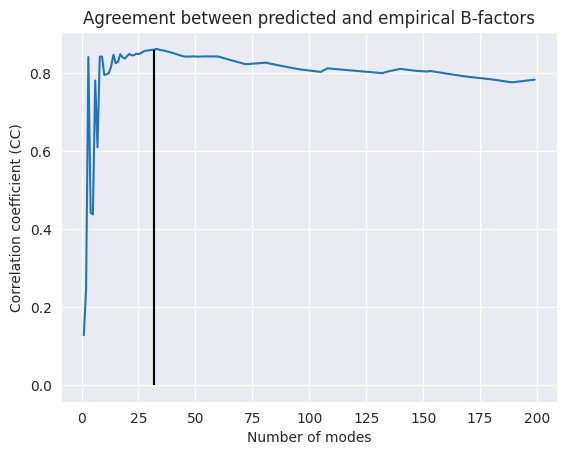

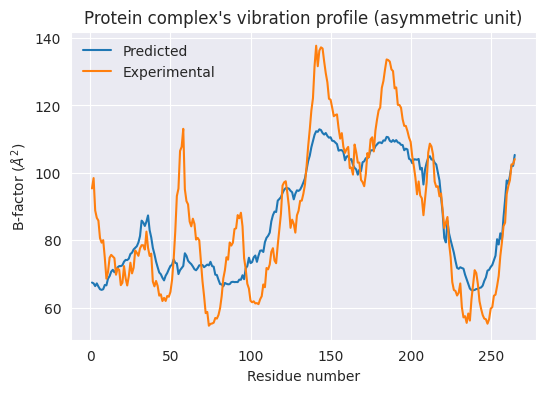

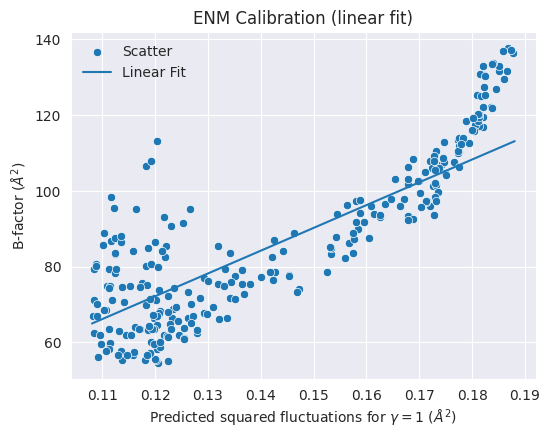

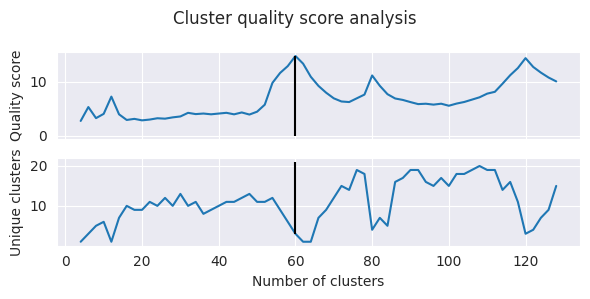

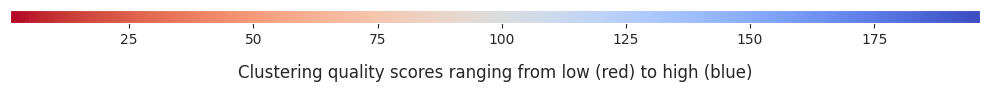

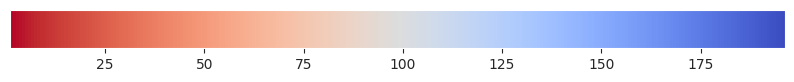

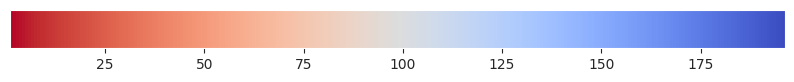

rendering


In [ ]:
if visualize_nglview == 'full':
  # If the above view doesn't change coloration, run this cell again.
  for i in range(view_scores.n_components):
    view_scores.clear_representations(component=i)
  createClusterRepresentation(pdb, residue_scores, view_scores, rwb_scale=True)
elif visualize_nglview == 'calphas':
  for i in range(view_scores.n_components):
    view_scores.clear_representations(component=i)
  # If the above view doesn't change coloration, run this cell again.
  createClusterRepresentation(pdb, residue_scores, view_scores, rep_type='spacefill', rwb_scale=True)
  # Add rep_type='spacefill' to represent the atoms of the capsid as spheres. This provides less information regarding the proteins but makes it easier to identify the geometry of the clusters
  #createClusterRepresentation(pdb, labels, view_clusters, rep_type='spacefill')
else:
  pass

In [ ]:
# Once you've done this use this code to download the results
if visualize_nglview in ('full', 'calphas'):
  view_scores.center()
  view_scores.download_image(f'{pdb}_residue_cluster_scores',factor=2)
  #img_scores = view_scores.render_image(factor = 1, trim=True)

## Snapshot of capsid

In [ ]:
if visualize_nglview == 'full':
  # This cell will create an standard view of the capsid, which the next cell will
  # modify to create the final result.
  view_capsid = createCapsidView(pdb, capsid)
elif visualize_nglview == 'calphas':
  view_capsid = createCapsidView(pdb, calphas)
elif visualize_nglview == 'none':
  print('Not visualizing results')
  view_capsid = 0
else:
  view_capsid = 0
  print('Incorrect value of visualize_nglview')
view_capsid

In [ ]:
# Once you've done this use this code to download the results
if visualize_nglview in ('full', 'calphas'):
  view_capsid._remote_call("setSize", target='Widget', args=['800px', '800px'])
  view_capsid.center()
  view_capsid.download_image(f'{pdb}_full_capsid',factor=2)
  #img_capsid = view_capsid.render_image(factor = 1, trim=True)

## Snapshot of asymmetric unit

In [ ]:
if visualize_nglview =='full':
  strucio.save_structure(pdb + '_asym.pdb', asymmetric_unit, hybrid36=True)
elif visualize_nglview == 'calphas':
  strucio.save_structure(pdb + '_asym.pdb', asymmetric_unit[asymmetric_unit.atom_name == 'CA'], hybrid36=True)

if visualize_nglview in ('full', 'calphas'):
  view_asym = ngl.NGLWidget()
  view_asym.add_component(FileStructure(pdb + '_asym.pdb'))
else:
  view_asym=0
view_asym

In [ ]:
if visualize_nglview in ('full', 'calphas'):
  view_asym._remote_call("setSize", target='Widget', args=['800px', '800px'])
  view_asym.center()
  view_asym.download_image(f'{pdb}_asymmetric_unit',factor=2)
  #img_asym = view_asym.render_image(factor = 1, trim=True)

## Structures folder

In [ ]:
# Generate folder
structures_dir = figures_dir + '/' + 'structures'
if not os.path.exists(structures_dir):
  os.mkdir(structures_dir)

### Asymmetric unit

In [ ]:
# Save image
dir_loc = structures_dir
file_name = asym_unit_fig_png
path_target = dir_loc + '/' + file_name


if visualize_nglview in ('full', 'calphas'):
  f = open(path_target,'wb')
  f.write(img_asym.value)
  f.close()
else:
  from PIL import Image
  image = Image.new('RGB', (20, 20))
  image.save(path_target)

### Capsid structure

In [ ]:
# Save image
dir_loc = structures_dir
file_name = capsid_fig_png
path_target = dir_loc + '/' + file_name

if visualize_nglview in ('full', 'calphas'):
  f = open(path_target,'wb')
  f.write(img_capsid.value)
  f.close()
else:
  from PIL import Image
  image = Image.new('RGB', (20, 20))
  image.save(path_target)

### Capsid scores

In [ ]:
# Save image
dir_loc = structures_dir
file_name = capsid_scores_fig_png
path_target = dir_loc + '/' + file_name


if visualize_nglview in ('full', 'calphas'):
  f = open(path_target,'wb')
  f.write(img_scores.value)
  f.close()
else:
  from PIL import Image
  image = Image.new('RGB', (20, 20))
  image.save(path_target)

### Capsid clusters

In [ ]:
# Save image
dir_loc = structures_dir
file_name = capsid_clusters_fig_png
path_target = dir_loc + '/' + file_name

if visualize_nglview in ('full', 'calphas'):
  f = open(path_target,'wb')
  f.write(img_clusters.value)
  f.close()
else:
  from PIL import Image
  image = Image.new('RGB', (20, 20))
  image.save(path_target)

# Generate advanced analysis
Adapt this section to offer users the opportunity to go deeper than the initial results to refine their interpretation or explore alternative outputs.

## ChimeraX visualization options
### `chimerax_script_colab.py`
+ `-report_dir` Location of `pyCapsid_report/chimerax` directory. Only needed if the script is in a separate directory from the report.

+ `-nc` Integer. Number of clusters in the corresponding results you want to visualize.
+ `-remote` True/False. Whether to use a remote structure from the PDB database or a local structure.
+ `-pdb` String. If remote is True or None, PDBID of the target structure. Otherwise, the local filename of the target structure
+ `-mode` String. Options are: `cluster`, `score`, `both`. Whether to end on the cluster coloring or score clustering (`cluster` or `score`), or create a duplicate model for each coloring for further visualization (`both`).
+ `-allClusters` True/False. Whether to create an individual snapshot of each cluster.
+ `-addClusterIDs` True/False. If True assigns a cluster id to each residue as a custom attribute in chimerax. This can be referenced in chimerax commands. For example: `show ::cluster_id=100 target mc only` hides everything but residues with the cluster_id 100.

### `chimerax_script_animate_mode.py`
+ `-report_dir` Location of `pyCapsid_report/chimerax` directory. Only needed if the script is in a separate directory from the report.
+ `-nmode` Integer. Index of normal mode to visualize
+ `-remote` True/False. Whether to use a remote structure from the PDB database or a local structure.
+ `-pdb` String. If remote is True or None, PDBID of the target structure. Otherwise, the local filename of the target structure
+ `-amplitude` Float. Maximum amplitude of motion along the mode for visualization purposes.
+ `-frames` Integer. Number of frames to generate for the animation.
+ `-save_frames` True/False. Whether to save the individual frames used to create the image

## Visualizing alternate results
The numerical results are saved as compressed .npz files by default and can be opened and used to visualize the results afterwards. This includes the ability to visualize clusters that weren't the highest scoring cluster. In this example
we visualize the results of clustering the capsid into 20 clusters.

To do this using ChimeraX, add the '-nc' optional parameter when running chimerax_colab_script.py
```
runscript "path/to/pyCapsid_report/chimerax/chimerax_script_colab.py" -nc 20
```
```
runscript browse -nc 20
```

To visualize saved results in the notebook using NGLView, modify and run the following code blocks.

In [ ]:
# from pyCapsid.VIS import visualizeSavedResults
# results_file = f'{pdb}_final_results_full.npz' # Path of the saved results
# labels_20, view_clusters = visualizeSavedResults(pdb, results_file, n_cluster=20, method='nglview')
# view_clusters

In [ ]:
# If the above view doesn't change coloration, run this cell again.
# In general do not run this cell until the above cell has finished rendering
# from pyCapsid.VIS import createClusterRepresentation
# createClusterRepresentation(pdb, labels_20, view_clusters)

# Add rep_type='spacefill' to represent the atoms of the capsid as spheres. This provides less information regarding the proteins but makes it easier to identify the geometry of the clusters
#createClusterRepresentation(pdb, labels, view_clusters, rep_type='spacefill')

## Visualizing mode dynamics
The user may visualize motion of the structure along a given normal mode using a script provided in the pyCapsid_report folder using one of the following commands:
```
runscript "path/to/pyCapsid_report/chimerax/chimerax_script_animate_mode.py" -nmode 8 -amplitude 5 -frames 60
```
```
runscript browse -nmode 8 -amplitude 5 -frames 60
```
This will create an .mp4 file in the figures/structures folder of the report.

This code creates the same animation using NGLView (only recommended when analyzing small structures or using a high performance CPU). Uncomment the code in this section to visualize motion along a given mode (n_mode). This code will download a series of images rendered in NGLView that can be used to create an animation. It can also download a multistructure PDB file that can be used to create an animation using ChimeraX's mseries command.

In [ ]:
# n_frames = 10 # number of frames to generate
# n_mode = 8 # mode to visualize
# max_amplitude = 3 # Angstroms, scale at which to visualize the mode.
# import numpy as np
# def generateTrajFromModes(calphas, capsid, modes, n_mode=0, max_amplitude=1, n_frames = 60):
#     import biotite.structure as struc
#     mode_vec = modes[:,  n_mode].reshape((-1,3))

#     vector_lengths = np.sqrt(np.sum(mode_vec**2, axis=-1))
#     scale = max_amplitude / np.max(vector_lengths)
#     mode_vec *= scale

#     time = np.linspace(0, 2*np.pi, n_frames, endpoint=False)
#     deviation = np.sin(time)[:, np.newaxis, np.newaxis] * mode_vec
#     print(deviation.shape)
#     oscillation = np.zeros((n_frames, len(capsid), 3))

#     residue_starts = struc.get_residue_starts(
#     capsid,
#     add_exclusive_stop=True)
#     print(residue_starts)
#     for i in range(len(residue_starts)-1):
#         res_start = residue_starts[i]
#         res_stop = residue_starts[i+1]
#         dev = deviation[:,i:i+1,:]
#         #print(res_stop)
#         oscillation[:,res_start:res_stop,:] = capsid.coord[res_start:res_stop,:] + dev
#     return oscillation

In [ ]:
# osc = generateTrajFromModes(calphas, capsid, evecs, n_mode=n_mode, max_amplitude=max_amplitude, n_frames=n_frames)

In [ ]:
# This code saves a PDB ensemble which can be visualized in ChimeraX using the
# mseries command
# import biotite.structure as struc
# oscillating_structure = struc.from_template(capsid, osc)
# import biotite.structure.io as strucio
# strucio.save_structure(f'{pdb}_oscillation.pdb', oscillating_structure)

In [ ]:
# from pyCapsid.VIS import createCapsidView
# view_modes = createCapsidView(pdb, capsid)
# view_modes

In [ ]:
#view_modes._remote_call("setSize", target='Widget', args=['800px', '800px'])

In [ ]:
# from time import sleep
# cycles = 1
# for i in range(cycles*n_frames):
#     f = i % n_frames
#     view_modes.set_coordinates({0: osc[f,:,:]})
#     view_modes.set_coordinates({1: osc[f,:,:]})
#     sleep(2.0)
#     view_modes.download_image(f'{pdb}_mode_{n_mode}_animation_frame_{i}',factor=1)